In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("football_data/australia-a-league-matches-2019-to-2020-stats.csv")

In [4]:
data = pd.DataFrame()
for y in range(2015,2023):
    data = data.append(pd.read_csv("football_data/australia-a-league-matches-{}-to-{}-stats.csv".format(y,y+1)), ignore_index=True)

In [5]:
def format_time_season(date):
    year = date.split(" ")[2]
    if "Oct" in date or "Nov" in date or "Dec" in date:
        return year + " - " + str(int(year) + 1)
    else:
        return str(int(year) - 1) + " - " + year

In [6]:
data.date_GMT = data.date_GMT.apply(format_time_season)

In [7]:
data = data[["date_GMT","home_team_name","away_team_name","home_team_goal_count", "away_team_goal_count","home_team_goal_timings","away_team_goal_timings"]]

In [8]:
data = data[(data["home_team_name"].str.contains('Sydney FC', na=False)) | (data["away_team_name"].str.contains('Sydney FC', na=False))]

In [9]:
#deal with for time of goals if there wasn't a goal for a given team
data.home_team_goal_timings = data.home_team_goal_timings.fillna("-1")
data.away_team_goal_timings = data.away_team_goal_timings.fillna("-1")

#remove extra time format
data["home_team_goal_timings"] = data["home_team_goal_timings"].apply(lambda x: [y[:2] for y in x.split(",")])
data["away_team_goal_timings"] = data["away_team_goal_timings"].apply(lambda x: [y[:2] for y in x.split(",")])

#get sydney goals
data["sydney_goals"] = data.apply(lambda x: x["home_team_goal_count"] if "Sydney FC" in x["home_team_name"] else x["away_team_goal_count"], axis=1)
#get opponent goals
data["away_goals"] = data.apply(lambda x: x["away_team_goal_count"] if "Sydney FC" in x["home_team_name"] else x["home_team_goal_count"], axis=1)
#get local stadium
data["sydney_home_stadium"] = data.apply(lambda x: 1 if "Sydney FC" in x["home_team_name"] else 0, axis=1)
#get winning team
data["sydney_match_results"] = data.apply(lambda x: 1 if x["sydney_goals"]>x["away_goals"] else (0 if x["sydney_goals"] == x["away_goals"] else -1), axis=1)


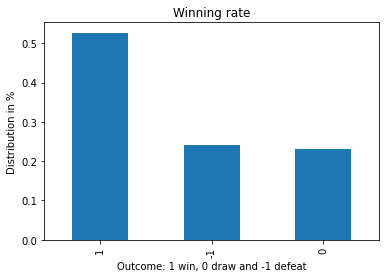

In [10]:
winning_results = data.sydney_match_results.value_counts()/data.sydney_match_results.count()
winning_results.plot(kind='bar')
plt.xlabel('Outcome: 1 win, 0 draw and -1 defeat')
plt.ylabel('Distribution in %')
plt.title('Winning rate')
plt.show()

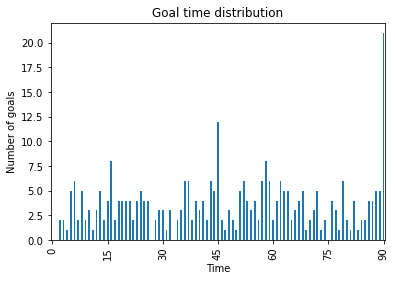

In [14]:
goal_distribution = data["home_team_goal_timings"].explode().value_counts().drop("-1").sort_index()
goal_distribution.index = goal_distribution.index.astype('float')
goal_distribution_all_minutes = goal_distribution.reindex(range(0, 91), fill_value=0)
ax = goal_distribution_all_minutes.plot(kind='bar')
ax.set_xticks([0,15,30,45,60,75,90])
plt.xlabel('Time')
plt.ylabel('Number of goals')
plt.title('Goal time distribution')
plt.show()

In [3]:
data.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_te